In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

#폰트설정
plt.rc('font',family = 'AppleGothic')

#### 분석하려는 데이터는 2005년부터 2018년까지 영아 사망원인 67항목별 , 사망자 수, 사망률 입니다. 데이터는 KOSIS에서 다운받았습니다.   
> **해당 데이터 프레임은 193행 x31열이며 데이터프레임의 변수 설명은 다음과 같습니다**   

|변수 | 설명 | 구분 |   
|:--------|:--------:|--------:|
| 영아사망원인(67항목) | 영아의 사망원인(질환 등) | 범주형 |  
| 성별 | 사망한 영아의 성별 | 범주형 |  
| 생존기간별 | 사망한 영아의 생존 기간( 0~6일 / 7~27일 / 28일 이상) |범주형 |  
| 사망자 수  | 연도별 사망한 영아의 수 | 연속형 |  
| 영아사망률(출생아 천명당)  | 연도별 영아사망률 | 연속형 |  

  
### 해당 데이터 분석의 순서를 다음과 같이 하겠습니다.  
#### [1. 데이터 불러오기  ](#1.데이터-불러오기)
#### [2. 데이터 조작해 깔끔한 데이터로 만들기](#2.데이터를-조작해-깔끔한-데이터로-만들기) 
#### [3. 데이터 기초분석 / 탐색 ](#3.-데이터-기초-분석-/-탐색)
#### [4. 데이터 클린징 ](#3.-데이터-클린징)
#### [5. 데이터 시각화](#5.-데이터-시각화) 
#### [6. 통계 또는 머신러닝](#6.통계-및-머신러닝)
#### [7. 결론 및 차별 포인트](#7.-결론-및-차별포인트)


#### 1.데이터 불러오기  
데이터를 불러오겠습니다. 
해당 데이터는 국가통계 포털 KOSIS에서 받아왔으며, 해당 데이터는 영아 사망원인과 사망률에 대해 다루고 있습니다. 해당 데이터의 분석을 통해 국가의 기본 지표가 되는 출생 중 영아 사망률에 대해 분석하여 출생에 관한 지표를 나타낼 수 있습니다. 

In [2]:
file_path = './data/영아사망원인_67항목__성_생존기간별_사망자수__영아사망률_2005__20200701234204.csv'
kosis_df = pd.read_csv(file_path,encoding = 'cp949')
kosis_df

,영아사망원인별(67항목),성별,생존기간별,2005,2005.1,2006,2006.1,2007,2007.1,2008,...,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1
0,영아사망원인별(67항목),성별,생존기간별,사망자수 (명),영아사망률 (출생아 천명당),사망자수 (명),영아사망률 (출생아 천명당),사망자수 (명),영아사망률 (출생아 천명당),사망자수 (명),...,사망자수 (명),영아사망률 (출생아 천명당),사망자수 (명),영아사망률 (출생아 천명당),사망자수 (명),영아사망률 (출생아 천명당),사망자수 (명),영아사망률 (출생아 천명당),사망자수 (명),영아사망률 (출생아 천명당)
1,계,계,계,1833,4.2,1710,3.8,1707,3.4,1580,...,1305,3.0,1190,2.7,1154,2.8,1000,2.8,931,2.8
2,계,계,0 - 6일,695,1.6,615,1.4,633,1.3,611,...,468,1.1,455,1.0,423,1.0,347,1.0,345,1.1
3,계,계,7 - 27일,334,0.8,363,0.8,335,0.7,247,...,275,0.6,222,0.5,237,0.6,199,0.6,188,0.6
4,계,계,28일이상 (명),804,1.8,732,1.6,739,1.5,722,...,562,1.3,513,1.2,494,1.2,454,1.3,398,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,질병이환 및 사망의 외인,남자,28일이상 (명),45,0.2,46,0.2,49,0.2,44,...,25,0.1,24,0.1,30,0.1,30,0.2,26,0.2
189,질병이환 및 사망의 외인,여자,계,49,0.2,36,0.2,37,0.2,42,...,26,0.1,30,0.1,29,0.1,24,0.1,16,0.1
190,질병이환 및 사망의 외인,여자,0 - 6일,1,0.0,3,0.0,4,0.0,4,...,1,0.0,10,0.0,3,0.0,2,0.0,0,-
191,질병이환 및 사망의 외인,여자,7 - 27일,6,0.0,2,0.0,1,0.0,1,...,1,0.0,1,0.0,1,0.0,2,0.0,0,-


#### 2.데이터를 조작해 깔끔한 데이터로 만들기  
해당 데이터는 범주형과 연속형 데이터가 모두 column에 있으므로 연도별 사망자 수와 영아 사망률을 pandas의 melt메소드를 통해 데이터 프레임을 정리해주겠습니다.   
column에 올 값은 영아 사망원인별 , 성별, 생존기간별, 연도, 사망자 수, 사망률이 있으며 row에 와야 하는 데이터들은 앞 열에 대응하는 값들입니다.

In [3]:
df = kosis_df.melt(id_vars=['영아사망원인별(67항목)','성별','생존기간별'])

In [4]:
df

,영아사망원인별(67항목),성별,생존기간별,variable,value
0,영아사망원인별(67항목),성별,생존기간별,2005,사망자수 (명)
1,계,계,계,2005,1833
2,계,계,0 - 6일,2005,695
3,계,계,7 - 27일,2005,334
4,계,계,28일이상 (명),2005,804
...,...,...,...,...,...
5399,질병이환 및 사망의 외인,남자,28일이상 (명),2018.1,0.2
5400,질병이환 및 사망의 외인,여자,계,2018.1,0.1
5401,질병이환 및 사망의 외인,여자,0 - 6일,2018.1,-
5402,질병이환 및 사망의 외인,여자,7 - 27일,2018.1,-


melt 메소드를 통해 의도한 변수들은 열로 정리된것을 볼 수 있습니다. 하지만 데이터 프레임이 사망자 수와 사망률이 제대로 분리되지 않은것을 확인할 수 있습니다.  
데이터를 다운받아 pandas로 불러올때, 각 연도의 사망자 수와 사망률이 200x , 200x.1 식으로 분리된 것을 볼 수 있습니다. 사망자 수와 사망률이 제대로 분리되지 않았으니 이를 조작해 분리시키는 작업을 하겠습니다.

In [5]:
df[['variable','value']]

,variable,value
0,2005,사망자수 (명)
1,2005,1833
2,2005,695
3,2005,334
4,2005,804
...,...,...
5399,2018.1,0.2
5400,2018.1,0.1
5401,2018.1,-
5402,2018.1,-


영아 사망률의 변수가 앞서 데이터 프레임에서 200x(연도).1 로 나타나고 사망률 값은 value으로 나타난것을 알 수 있으므로 variables 열에서 200x.1인 행들을 찾아 그에 대응하는 value값을을 찾겠습니다.  
예시로 2005년의 사망률을 찾아보겠습니다.

In [6]:
df_2005 = df.loc[df['variable']=='2005.1' ]
#193행부터 생존기간 별 인것을 알 수 있음

In [7]:
df_2005 = df_2005.reset_index()
df_2005

,index,영아사망원인별(67항목),성별,생존기간별,variable,value
0,193,영아사망원인별(67항목),성별,생존기간별,2005.1,영아사망률 (출생아 천명당)
1,194,계,계,계,2005.1,4.2
2,195,계,계,0 - 6일,2005.1,1.6
3,196,계,계,7 - 27일,2005.1,0.8
4,197,계,계,28일이상 (명),2005.1,1.8
...,...,...,...,...,...,...
188,381,질병이환 및 사망의 외인,남자,28일이상 (명),2005.1,0.2
189,382,질병이환 및 사망의 외인,여자,계,2005.1,0.2
190,383,질병이환 및 사망의 외인,여자,0 - 6일,2005.1,0.0
191,384,질병이환 및 사망의 외인,여자,7 - 27일,2005.1,0.0


2005년도의 영아 사망률 값이 존재하는 행들을 찾아보면, 각 연도마다 193행씩 있는것을 알 수 있습니다.

In [8]:
df['영아 사망률'] = df_2005['value']

variables 행의 . 문자열을 분리하겠습니다.

In [9]:
df['variable'].str.split(".",expand=True)

,0,1
0,2005,None
1,2005,None
2,2005,None
3,2005,None
4,2005,None
...,...,...
5399,2018,1
5400,2018,1
5401,2018,1
5402,2018,1


variables의 값을 문자열분리를 통해, . 뒤에 값이 존재하는 행들을 subset으로 만들어 준뒤, index를 재정렬하고, 해당 subset의 value는 영아 사망률을 나타내므로 기존 데이터 프레임에 영아 사망률이라는 새로운 행으로 이어줍니다.

In [10]:
subset = df[df['variable'].str.split(".",expand=True)[1] == '1']
subset = subset.reset_index()
subset
del_index = df[df['variable'].str.split(".",expand=True)[1] == '1'].index
df = df.drop(del_index)
df = df.reset_index()

In [11]:
df['영아사망률'] = subset['value']
# 데이터를 붙여넣는 과정에서 값에 문자열이 들어간 행을 삭제해준다.
del_index = df[df['value'] == '사망자수 (명)'].index
df = df.drop(del_index)
df.reset_index()
pd.set_option('display.max_rows', 500)

In [12]:
df.head(200)

,index,영아사망원인별(67항목),성별,생존기간별,variable,value,영아 사망률,영아사망률
1,1,계,계,계,2005,1833,4.2,4.2
2,2,계,계,0 - 6일,2005,695,1.6,1.6
3,3,계,계,7 - 27일,2005,334,0.8,0.8
4,4,계,계,28일이상 (명),2005,804,1.8,1.8
5,5,계,남자,계,2005,980,4.3,4.3
6,6,계,남자,0 - 6일,2005,378,1.7,1.7
7,7,계,남자,7 - 27일,2005,176,0.8,0.8
8,8,계,남자,28일이상 (명),2005,426,1.9,1.9
9,9,계,여자,계,2005,853,4.0,4.0
10,10,계,여자,0 - 6일,2005,317,1.5,1.5


In [13]:
df.tail(100)

,index,영아사망원인별(67항목),성별,생존기간별,variable,value,영아 사망률,영아사망률
2602,5111,순환기계통의 질환,여자,계,2018,4,NaN,0.0
2603,5112,순환기계통의 질환,여자,0 - 6일,2018,0,NaN,-
2604,5113,순환기계통의 질환,여자,7 - 27일,2018,0,NaN,-
2605,5114,순환기계통의 질환,여자,28일이상 (명),2018,4,NaN,0.0
2606,5115,호흡기계통의 질환,계,계,2018,9,NaN,0.0
2607,5116,호흡기계통의 질환,계,0 - 6일,2018,0,NaN,-
2608,5117,호흡기계통의 질환,계,7 - 27일,2018,0,NaN,-
2609,5118,호흡기계통의 질환,계,28일이상 (명),2018,9,NaN,0.0
2610,5119,호흡기계통의 질환,남자,계,2018,4,NaN,0.0
2611,5120,호흡기계통의 질환,남자,0 - 6일,2018,0,NaN,-


앞서 과정을 통해 데이터프레임이 의도된대로 깔끔한 데이터가 된 것을 볼 수 있습니다. 이제 마지막으로 변수이름을 알맞는 이름으로 바꾸는 작업과 필요없는 행들을 삭제해주겠습니다. 

In [14]:
df = df.rename({'variable':'연도','value':'사망자 수(명)','영아사망률':'영아사망률(천명당)' },axis ='columns')
df = df.drop(['index','영아 사망률'],axis = 1)



In [15]:
#데이터 백업하기
df_copy_backup = df.copy()
df.to_csv('./data/df_copy_backup.csv')

이렇게 tidy data를 얻은것을 볼 수 있습니다.  
  
  
#### 3. 데이터 기초 분석 / 탐색  

이제 정리된 데이터의 기본 정보를 살펴보겠습니다.

In [16]:
df

,영아사망원인별(67항목),성별,생존기간별,연도,사망자 수(명),영아사망률(천명당)
1,계,계,계,2005,1833,4.2
2,계,계,0 - 6일,2005,695,1.6
3,계,계,7 - 27일,2005,334,0.8
4,계,계,28일이상 (명),2005,804,1.8
5,계,남자,계,2005,980,4.3
...,...,...,...,...,...,...
2697,질병이환 및 사망의 외인,남자,28일이상 (명),2018,26,0.2
2698,질병이환 및 사망의 외인,여자,계,2018,16,0.1
2699,질병이환 및 사망의 외인,여자,0 - 6일,2018,0,-
2700,질병이환 및 사망의 외인,여자,7 - 27일,2018,0,-


In [17]:
#데이터 프레임의 기본 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2688 entries, 1 to 2701
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   영아사망원인별(67항목)  2688 non-null   object
 1   성별             2688 non-null   object
 2   생존기간별          2688 non-null   object
 3   연도             2688 non-null   object
 4   사망자 수(명)       2688 non-null   object
 5   영아사망률(천명당)     2688 non-null   object
dtypes: object(6)
memory usage: 147.0+ KB


해당 데이터 프레임의 연속형 변수들을 통계를 내기 위해 연속형 변수의 형변환을 해주겠습니다.

In [18]:
#연속형 변수를 정수,실수로 바꿔주기 위해 -를 null로 바꿔줍니다
df['영아사망률(천명당)'] = df['영아사망률(천명당)'].replace('-',np.nan)

In [19]:
df['사망자 수(명)'] = df['사망자 수(명)'].astype(int)
df['영아사망률(천명당)'] = df['영아사망률(천명당)'].astype(float)
df['사망자 수(명)'] = df['사망자 수(명)'].astype(int)

데이터 프레임의 기초 통계 확인

In [20]:
df.describe()

,사망자 수(명),영아사망률(천명당)
count,2688.000000,1900.000000
mean,57.970238,0.274000
std,159.654893,0.583418
min,0.000000,0.000000
25%,0.000000,0.000000
50%,4.000000,0.000000
75%,28.000000,0.300000
max,1833.000000,4.300000


In [21]:
#데이터 유형확인
df.dtypes

영아사망원인별(67항목)     object
성별                object
생존기간별             object
연도                object
사망자 수(명)           int64
영아사망률(천명당)       float64
dtype: object

In [22]:
#데이터 행 인덱스 확인
df.loc[1]

영아사망원인별(67항목)       계
성별                  계
생존기간별               계
연도               2005
사망자 수(명)         1833
영아사망률(천명당)        4.2
Name: 1, dtype: object

In [23]:
#연속형 변수의 중앙값
df.median()

연도            2011.5
사망자 수(명)         4.0
영아사망률(천명당)       0.0
dtype: float64

In [24]:
#각 연도의 개수 출력
df['연도'].value_counts()

2006    192
2017    192
2008    192
2010    192
2016    192
2014    192
2005    192
2015    192
2009    192
2011    192
2013    192
2012    192
2007    192
2018    192
Name: 연도, dtype: int64

In [25]:
df['연도'].unique()

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018'], dtype=object)

In [26]:
df['성별'].unique()

array(['계', '남자', '여자'], dtype=object)

In [27]:
#성별의 '계' 를 전체로 바꾸기
df['성별'] = df['성별'].replace('계','전체')
df['성별'].unique()

array(['전체', '남자', '여자'], dtype=object)

In [28]:
#생존기간별 유니크값 보기
df['생존기간별'].unique()

array(['계', '0 - 6일', '7 - 27일', '28일이상 (명)'], dtype=object)

In [29]:
#성별의 '계' 를 전체로 바꾸기
df['생존기간별'] = df['생존기간별'].replace('계','전체')
df['생존기간별'].unique()

array(['전체', '0 - 6일', '7 - 27일', '28일이상 (명)'], dtype=object)

In [30]:
#단순열 합계
df.sum(axis = 1)

1       1837.2
2        696.6
3        334.8
4        805.8
5        984.3
         ...  
2697      26.2
2698      16.1
2699       0.0
2700       0.0
2701      16.1
Length: 2688, dtype: float64

In [31]:
#사망률 별 내림차순
df.sort_values(by = ['영아사망률(천명당)'],ascending = False)

,영아사망원인별(67항목),성별,생존기간별,연도,사망자 수(명),영아사망률(천명당)
5,계,남자,전체,2005,980,4.3
1,계,전체,전체,2005,1833,4.2
198,계,남자,전체,2006,958,4.1
9,계,여자,전체,2005,853,4.0
194,계,전체,전체,2006,1710,3.8
...,...,...,...,...,...,...
2692,질병이환 및 사망의 외인,전체,7 - 27일,2018,0,NaN
2695,질병이환 및 사망의 외인,남자,0 - 6일,2018,0,NaN
2696,질병이환 및 사망의 외인,남자,7 - 27일,2018,0,NaN
2699,질병이환 및 사망의 외인,여자,0 - 6일,2018,0,NaN


In [32]:
#행 , 열 구조보기
df.values

array([['계', '전체', '전체', '2005', 1833, 4.2],
       ['계', '전체', '0 - 6일', '2005', 695, 1.6],
       ['계', '전체', '7 - 27일', '2005', 334, 0.8],
       ...,
       ['질병이환 및 사망의 외인', '여자', '0 - 6일', '2018', 0, nan],
       ['질병이환 및 사망의 외인', '여자', '7 - 27일', '2018', 0, nan],
       ['질병이환 및 사망의 외인', '여자', '28일이상 (명)', '2018', 16, 0.1]],
      dtype=object)

### **그룹분석(연도별, 사망원인별, 성별)**  
연도별 사망자 수 평균 , 사망률 평균  
사망원인 별 사망자 수 평균, 사망률 평균  
성별 별 사망자 수 평균, 사망률 평균 을 그룹분석으로 알아보겠습니다.

In [33]:
#사망원인 별 그룹분석 
group1 = df.groupby('영아사망원인별(67항목)').mean()
group1.sort_values(by = ['영아사망률(천명당)'],ascending = False)

,사망자 수(명),영아사망률(천명당)
영아사망원인별(67항목),,
계,463.761905,1.580357
출생전후기에 기원한 특정병태,240.928571,0.824405
"선천기형, 변형 및 염색체이상",92.357143,0.316071
"달리분류되지 않은 증상, 징후와 임상 및 검사의 이상 소견",61.976190,0.210714
질병이환 및 사망의 외인,23.785714,0.083117
신경계통의 질환,8.976190,0.039837
호흡기계통의 질환,6.547619,0.030526
순환기계통의 질환,8.309524,0.025342
특정 감염성 및 기생충성 질환,5.857143,0.017829


 사망원인 별 그룹분석을 통해 '출생전후기에 기원한 특정병태'로 영아 사망률이 가장 높은것을 알 수 있습니다.

In [34]:
#연도별 그룹분석
group2 = df.groupby('연도').mean()
group2.sort_values(by = ['영아사망률(천명당)'],ascending = False)

,사망자 수(명),영아사망률(천명당)
연도,,
2005,76.375000,0.348951
2006,71.250000,0.300671
2007,71.125000,0.286806
2008,65.833333,0.286429
2011,59.791667,0.283333
2009,58.958333,0.276259
2010,62.833333,0.271739
2018,38.791667,0.266935
2015,49.583333,0.265812


2005년도에 영아가 가장 많이 사망했음을 알 수 있습니다.

In [35]:
#성별 그룹분석
group3 = df.groupby('성별').mean()
group3.sort_values(by = ['영아사망률(천명당)'],ascending = False)

,사망자 수(명),영아사망률(천명당)
성별,,
남자,48.080357,0.302258
여자,38.875000,0.264511
전체,86.955357,0.256573


성별 그룹분석을 통해 남아가 가장많이 사망했음을 알 수 있습니다.

### 피봇테이블을 이용한 그룹분석  
1. 연도별 사망원인에 따른 사망자 수  
2. 성별 별 연도에 따른 사망자 수 
3. 생존기간 별 사망원인에 따른 사망자 수

In [36]:
# 연도별 사망원인따른 사망자 수 
pd.pivot_table(df,index='연도',columns ='영아사망원인별(67항목)' , values ='사망자 수(명)')

영아사망원인별(67항목),계,귀 및 꼭지돌기의 질환,"내분비, 영양 및 대사 질환","달리분류되지 않은 증상, 징후와 임상 및 검사의 이상 소견",모든 기타 질환,비뇨생식기계통의 질환,"선천기형, 변형 및 염색체이상",소화기계통의 질환,순환기계통의 질환,신경계통의 질환,신생물,질병이환 및 사망의 외인,출생전후기에 기원한 특정병태,특정 감염성 및 기생충성 질환,혈액 및 조혈기관질환과 면역기전을 침범하는 특정장애,호흡기계통의 질환
연도,,,,,,,,,,,,,,,,
2005,611.000000,0.0,4.333333,97.000000,0.666667,0.333333,119.666667,3.000000,11.333333,9.666667,8.333333,32.666667,301.000000,10.000000,4.000000,9.000000
2006,570.000000,0.0,6.333333,81.666667,0.666667,2.333333,113.666667,3.333333,7.000000,15.333333,10.000000,27.333333,285.666667,8.333333,1.666667,6.666667
2007,569.000000,0.0,4.333333,56.333333,0.333333,1.333333,124.000000,1.666667,13.333333,12.000000,9.666667,29.000000,300.000000,4.666667,3.000000,9.333333
2008,526.666667,0.0,5.666667,73.000000,0.000000,1.000000,102.000000,2.666667,7.333333,14.333333,6.666667,30.000000,267.000000,5.000000,2.666667,9.333333
2009,471.666667,0.0,3.000000,55.333333,0.000000,0.333333,91.000000,3.000000,12.000000,11.666667,7.000000,26.666667,243.000000,9.333333,1.333333,8.000000
2010,502.666667,0.0,3.333333,62.333333,0.666667,0.333333,94.333333,1.333333,7.000000,8.000000,5.666667,26.000000,272.666667,9.666667,3.000000,8.333333
2011,478.333333,0.0,2.666667,62.333333,0.333333,0.000000,94.000000,1.333333,6.666667,9.666667,5.666667,25.333333,253.000000,6.333333,1.666667,9.333333
2012,468.333333,0.0,2.666667,58.333333,0.333333,0.666667,91.333333,1.333333,7.333333,10.333333,6.000000,25.666667,252.666667,5.000000,2.000000,4.666667
2013,435.000000,0.0,1.666667,58.666667,0.333333,1.000000,90.333333,1.333333,8.333333,5.333333,6.333333,20.333333,227.666667,4.333333,3.333333,6.000000


In [37]:
#성별 별 연도에 따른 사망자 수
pd.pivot_table(df, index='연도',columns ='성별',values ='사망자 수(명)')

성별,남자,여자,전체
연도,,,
2005,61.2500,53.3125,114.5625
2006,59.8750,47.0000,106.8750
2007,58.5000,48.1875,106.6875
2008,52.6250,46.1250,98.7500
2009,47.2500,41.1875,88.4375
2010,55.5000,38.7500,94.2500
2011,51.1250,38.5625,89.6875
2012,48.6875,39.1250,87.8125
2013,43.6250,37.9375,81.5625


In [38]:
#생존기간 별 사망원인에 따른 사망자 수
pd.pivot_table(df, index='생존기간별',columns ='영아사망원인별(67항목)',values ='사망자 수(명)')

영아사망원인별(67항목),계,귀 및 꼭지돌기의 질환,"내분비, 영양 및 대사 질환","달리분류되지 않은 증상, 징후와 임상 및 검사의 이상 소견",모든 기타 질환,비뇨생식기계통의 질환,"선천기형, 변형 및 염색체이상",소화기계통의 질환,순환기계통의 질환,신경계통의 질환,신생물,질병이환 및 사망의 외인,출생전후기에 기원한 특정병태,특정 감염성 및 기생충성 질환,혈액 및 조혈기관질환과 면역기전을 침범하는 특정장애,호흡기계통의 질환
생존기간별,,,,,,,,,,,,,,,,
0 - 6일,347.952381,0.0,1.476190,24.142857,0.000000,0.000000,51.238095,0.095238,1.619048,0.333333,1.476190,4.380952,262.380952,0.619048,0.190476,0.000000
28일이상 (명),403.476190,0.0,4.619048,90.761905,0.619048,1.142857,96.952381,3.047619,13.380952,16.333333,9.761905,41.333333,98.571429,9.952381,4.190476,12.809524
7 - 27일,176.095238,0.0,1.333333,9.047619,0.000000,0.142857,36.523810,0.380952,1.619048,1.285714,1.333333,1.857143,120.904762,1.142857,0.238095,0.285714
전체,927.523810,0.0,7.428571,123.952381,0.619048,1.285714,184.714286,3.523810,16.619048,17.952381,12.571429,47.571429,481.857143,11.714286,4.619048,13.095238


### 3. 데이터 클린징  
#### 앞 과정에서 데이터 보기가 끝났으니 데이터 클린징을 시작해보겠습니다.   
클린징을 시작하기 앞서 결측치 개수를 확인합니다.

In [39]:
df.count()

영아사망원인별(67항목)    2688
성별               2688
생존기간별            2688
연도               2688
사망자 수(명)         2688
영아사망률(천명당)       1900
dtype: int64

In [40]:
#결측치 확인
df.isnull().sum()

영아사망원인별(67항목)      0
성별                 0
생존기간별              0
연도                 0
사망자 수(명)           0
영아사망률(천명당)       788
dtype: int64

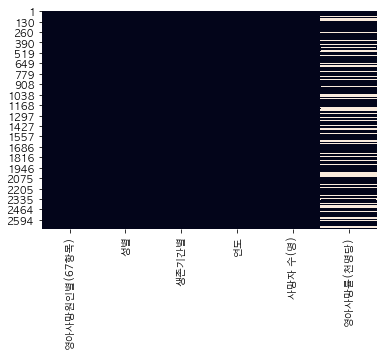

In [41]:
#결측치 시각화
sns.heatmap(df.isnull(), cbar =False)

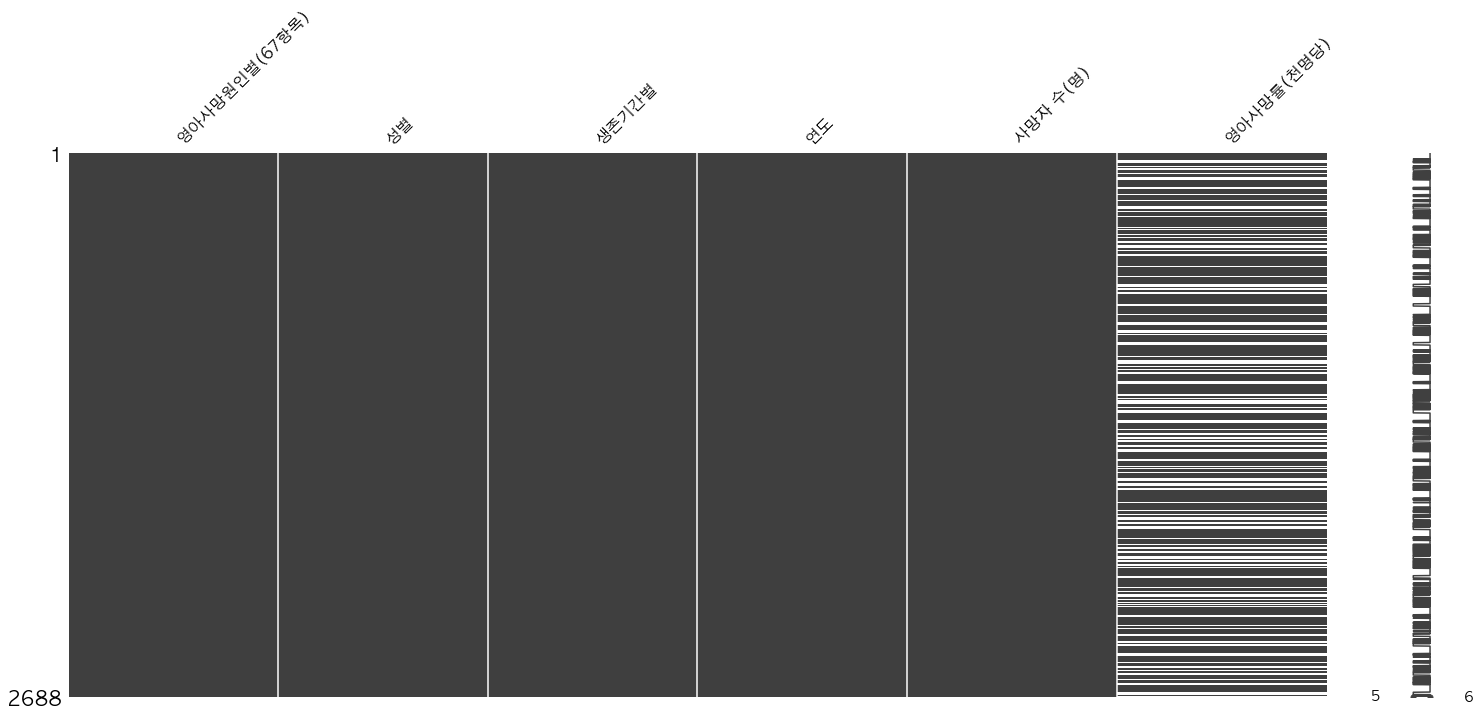

In [42]:
import missingno as msno
msno.matrix(df)

#### 영아사망률의 결측치가 많은것으로 나와있지만, 영아 사망 데이터 분석에 필요한 자료이므로 해당 열의 결측치를 중앙값 혹은 평균값으로 바꿔줍니다  
결측치를 대체하기 전에 해당 열의 중앙값을 파악합니다.

In [43]:
df.median()

연도            2011.5
사망자 수(명)         4.0
영아사망률(천명당)       0.0
dtype: float64

In [44]:
df[df['사망자 수(명)'] == 0]

,영아사망원인별(67항목),성별,생존기간별,연도,사망자 수(명),영아사망률(천명당)
30,신생물,남자,0 - 6일,2005,0,NaN
38,혈액 및 조혈기관질환과 면역기전을 침범하는 특정장애,전체,0 - 6일,2005,0,NaN
39,혈액 및 조혈기관질환과 면역기전을 침범하는 특정장애,전체,7 - 27일,2005,0,NaN
42,혈액 및 조혈기관질환과 면역기전을 침범하는 특정장애,남자,0 - 6일,2005,0,NaN
43,혈액 및 조혈기관질환과 면역기전을 침범하는 특정장애,남자,7 - 27일,2005,0,NaN
...,...,...,...,...,...,...
2692,질병이환 및 사망의 외인,전체,7 - 27일,2018,0,NaN
2695,질병이환 및 사망의 외인,남자,0 - 6일,2018,0,NaN
2696,질병이환 및 사망의 외인,남자,7 - 27일,2018,0,NaN
2699,질병이환 및 사망의 외인,여자,0 - 6일,2018,0,NaN


영아 사망자 수가 0명일때 영아 사망률은 모두 결측치로 나옵니다. 또 사망자 수가 0명일때의 행의 개수와 영아사망률 열의 결측치 개수와 같습니다.  
이를통해, 영아 사망률이 결측치로 나오는 것은 사망자 수가 0명이기 때문인것을 알 수 있습니다.  
**따라서 결측치를 평균값(0.274)이 아닌 중앙값(0.0)으로 대체하도록 합니다**

In [45]:
df['영아사망률(천명당)'] = df['영아사망률(천명당)'].fillna(df['영아사망률(천명당)'].median())

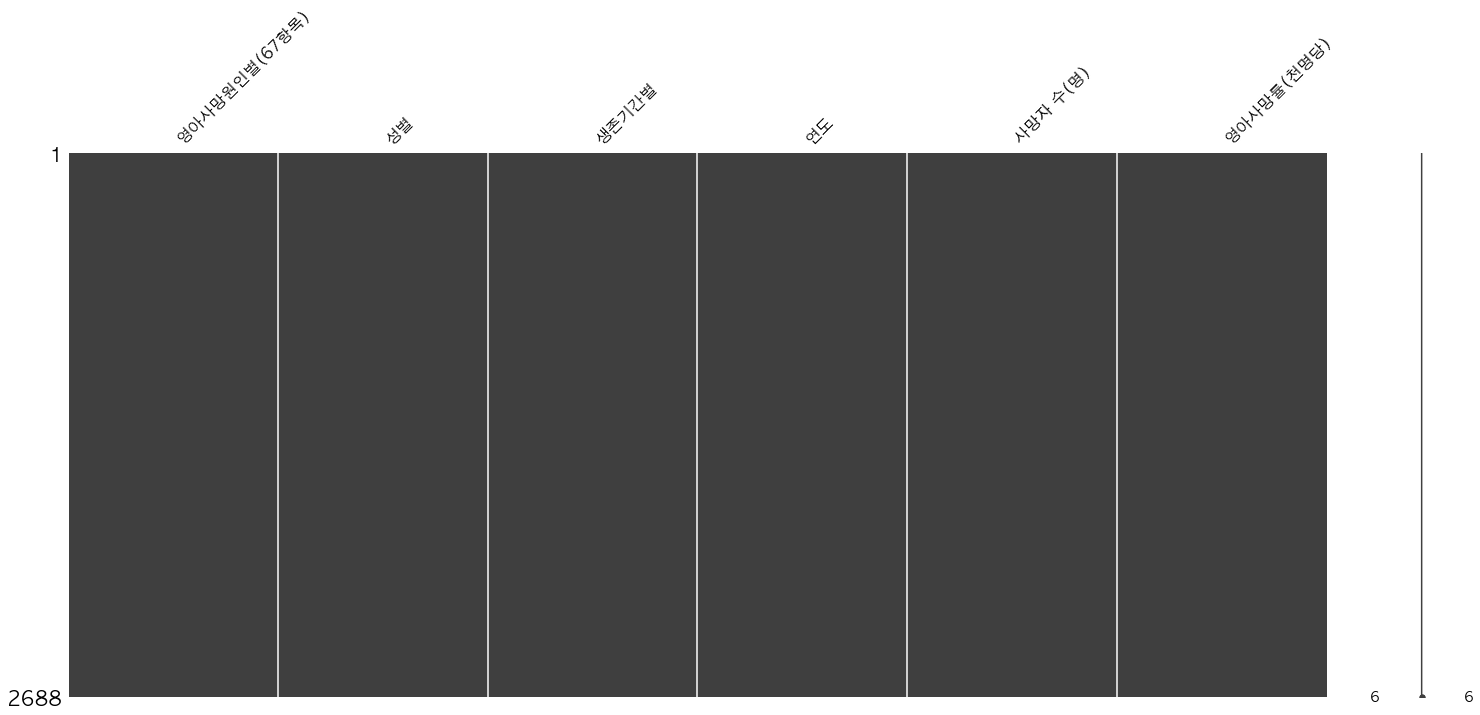

In [46]:
#결측치 대체 최종 확인
msno.matrix(df)

이제 해당 데이터 프레임의 결측치가 존재하지 않는것을 확인 할 수 있습니다.

### 5. 데이터 시각화  
 데이터 클린징과 기본 분석을 끝냈으니 데이터 시각화를 진행합니다. 
 해당 데이터 특성상, 범주형은 연도에 따라 모두 동등하게 전부 갯수가 같기 때문에 범주형 단일변수나, 범주형*범주형 다변수 그래프는 시각화의 의미가 없을 것 으로 판단되어 범주형*연속형 다변수의 시각화를 진행합니다.
 1. 연도별 전체 영아 사망자 수  
 2. 연도별 전체 영아 사망률  
 3. 전체 사망자 중, 사망원인에 따른 사망자 수
 4. 생존기간별/ 사망자 /성별 관계 ( lmplot) 
 5. 사망 원인별 사망자 수의 관계 / 성별 별 

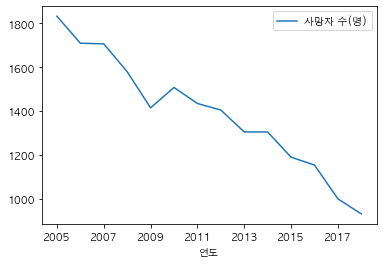

In [47]:
#연도별 전체 영아 사망자 수
df_death_all = df[(df['영아사망원인별(67항목)'] == '계') & (df['생존기간별'] == '전체') & (df['성별'] == '전체') ] 
df_death_all.plot(x='연도', y='사망자 수(명)')

연도가 증가할 수록 영아 사망자 수가 줄어드는 것을 알 수 있습니다.

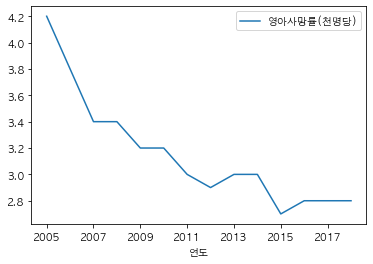

In [48]:
#연도 전체 영아 사망률
df_death_all.plot(x='연도', y='영아사망률(천명당)')

사망자 그래프와 같이 사망률 그래프도 연도가 증가할 수 록 줄어드는것을 확인할 수 있지만, 감소하는 정도를 보아 사망자 수와 사망률이 감소하는 정도가 다름을 알 수 있습니다.

정확한 두 연속형 변수간의 상관성을 확인하기 위해 산점도로 시각화 하겠습니다.

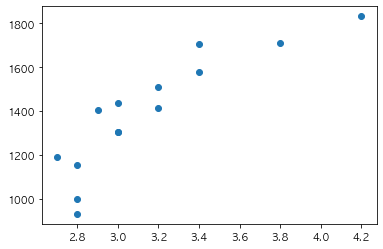

In [49]:
plt.scatter(df_death_all['영아사망률(천명당)'],df_death_all['사망자 수(명)'])

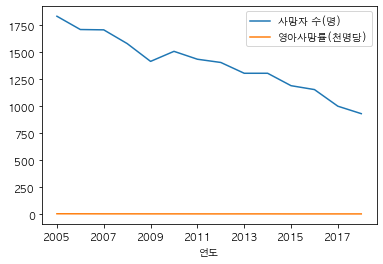

In [50]:
df_death_all.set_index(['연도']).plot()

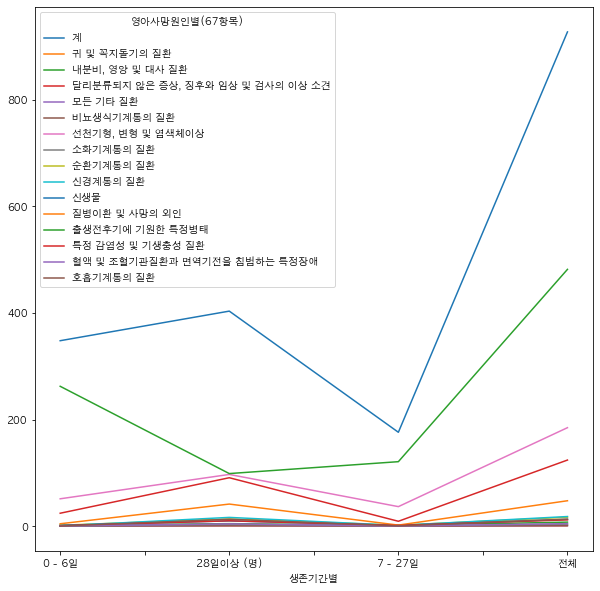

In [51]:
#전체 사망자 중, 사망원인에 따른 사망자 수
plt.rcParams["figure.figsize"] = (10,10) #그래프 크기 조절
df2 = pd.pivot_table(df, index='생존기간별',columns ='영아사망원인별(67항목)',values ='사망자 수(명)')
df2.plot()

또한 0~6 일, 7~27일동안 생존한 영아들 보다, 28일 이상 생존한 영아들 중 사망자 수가 가장 많은것을 알 수 있습니다. 이는 28일 이상 생존한 영아들의 표본이 커서 사망자 수가 더 크게 집계된 것으로 짐작할 수 있습니다.  
하지만, **어떤 색의 선이 어떤 사망원인인지 모른다는 문제점이 생겼습니다.** 해당 그래프의 변수가 너무많아 다른 변수에 중복되는 색이 생겨 어떤 색이 어떤 변수인지 구분을 못하기 때문에, 해당 데이터프레임의 변수를 조작하여 새로운 변수를 만들고, 줄여서 좀 더 간단히 시각화를 해보겠습니다.

### 새로운 변수를 추가하여 시각화

#### 위 그래프를 보아 상위 4~5개의 질병을 제외한 나머지 사망원인들은 다른 사망원인에 비해 매우 미미하고, 서로 별 차이가 없는것을 알 수 있습니다. 따라서 상위 5개의 사망원인을 제외한 나머지 사망원인들을 모두 더해 기타 사망원인이라는 새로운 변수를 만들겠습니다.  
상위 5개 원인을 알아보기 위해 내림차순으로 그래프를 새로 만들겠습니다.

In [52]:
df3 = pd.pivot_table(df, index='영아사망원인별(67항목)',columns ='생존기간별',values ='사망자 수(명)')
df3 = df3.sort_values(by = ['전체'],ascending = False)
df3

생존기간별,0 - 6일,28일이상 (명),7 - 27일,전체
영아사망원인별(67항목),,,,
계,347.952381,403.476190,176.095238,927.523810
출생전후기에 기원한 특정병태,262.380952,98.571429,120.904762,481.857143
"선천기형, 변형 및 염색체이상",51.238095,96.952381,36.523810,184.714286
"달리분류되지 않은 증상, 징후와 임상 및 검사의 이상 소견",24.142857,90.761905,9.047619,123.952381
질병이환 및 사망의 외인,4.380952,41.333333,1.857143,47.571429
신경계통의 질환,0.333333,16.333333,1.285714,17.952381
순환기계통의 질환,1.619048,13.380952,1.619048,16.619048
호흡기계통의 질환,0.000000,12.809524,0.285714,13.095238
신생물,1.476190,9.761905,1.333333,12.571429


상위 5개 사망원인( 출생전후기 , 선천기형, 분류되지 않은 증상, 질병이환, 신경계통 ) 를 제외한 하위 사망원인들을 모두 더해주겠습니다.

In [53]:
df4 = df3[7:]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 호흡기계통의 질환 to 귀 및 꼭지돌기의 질환
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0 - 6일     9 non-null      float64
 1   28일이상 (명)  9 non-null      float64
 2   7 - 27일    9 non-null      float64
 3   전체         9 non-null      float64
dtypes: float64(4)
memory usage: 360.0+ bytes


In [54]:
#기타질환 행 새로 추가
df4 = pd.DataFrame(df4.sum())
df4 = np.transpose(df4)
df4.loc[0]

생존기간별
0 - 6일        3.857143
28일이상 (명)    46.142857
7 - 27일       4.857143
전체           54.857143
Name: 0, dtype: float64

In [55]:
#상위 5개 사망원인
df3 = df3[1:6]
#df3 = df3.append(df4.loc[0])

#합친 기타 질환 추가
df3.loc['기타질환'] = df4.loc[0]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
df3

생존기간별,0 - 6일,28일이상 (명),7 - 27일,전체
영아사망원인별(67항목),,,,
출생전후기에 기원한 특정병태,262.380952,98.571429,120.904762,481.857143
"선천기형, 변형 및 염색체이상",51.238095,96.952381,36.523810,184.714286
"달리분류되지 않은 증상, 징후와 임상 및 검사의 이상 소견",24.142857,90.761905,9.047619,123.952381
질병이환 및 사망의 외인,4.380952,41.333333,1.857143,47.571429
신경계통의 질환,0.333333,16.333333,1.285714,17.952381
기타질환,3.857143,46.142857,4.857143,54.857143


In [57]:
#시각화 하기 위해 행과 열을 반전
df3 = np.transpose(df3)


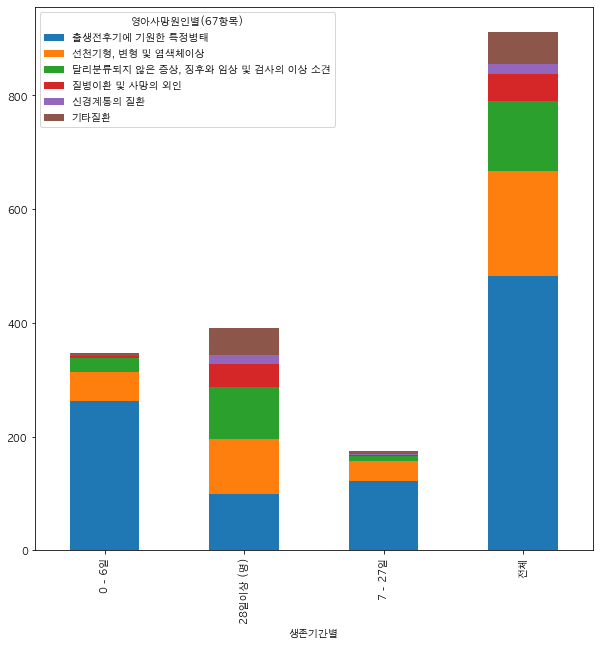

In [58]:
df3.plot(kind='bar',stacked = True)

이렇게 차이가 미미한 변수들을 기타 질환이라는 새로운 변수로 만들어 조금 더 보기 쉽게 시각화 할 수 있습니다.  
따라서 해당 그래프를 보면, 전체 기준으로 '출생 전후기에 기원한 특정병태'의 질환으로 영아들이 사망한것을 알 수 있습니다. 그 다음으로 선천기형,분류되지 않은 증상등의 사망원인이 큰것을 알 수 있습니다.  
28일 이상 생존하다 사망한 영아들의 표본이 다른 표본에비해 더 많을 것을 감안하면, 0~6일 정도 사이에 생존하다 사망하는 영아들의 수가 가장 많을 것으로 추정됩니다.  

이제 각 다음 경우들의 시각화를 살펴보겠습니다.  
+ 성별에 따른 연도별 사망자 수  
+ 연도별 사망원인에 따른 사망자수  

In [59]:
#성별에 따른 연도별 사망자 수

df5 = df[(df['성별']!='전체') & (df['생존기간별']=='전체') & (df['영아사망원인별(67항목)']=='계')]

<ipython-input-60-165e6e7bf257>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['연도'] = df5['연도'].astype(int)


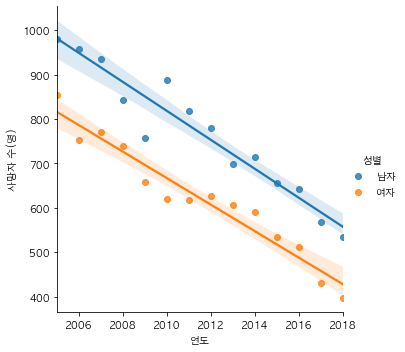

In [60]:
#두 연속형 변수 그래프를 그리기 위한 형변환
df5['연도'] = df5['연도'].astype(int)
df5.dtypes

sns.lmplot('연도','사망자 수(명)',hue='성별',data= df5)


연도에 따른 사망자의 수는 여아, 남아 간 감소 경향 차이는 없는 것을 알 수 있습니다. 또 남아의 사망자 수가 여아의 사망자 수 보다 많은것을 알 수 있습니다.

In [61]:
#연도별 사망원인에 따른 사망자수

#앞서 진행한것과 같이 변수를 줄이고 시각화하기 좋게 데이터 프레임 생성
df6 = pd.pivot_table(df, index='영아사망원인별(67항목)',columns ='연도',values ='사망자 수(명)')
df6 = df6.sort_values(by = ['2005'],ascending = False)
df7 = df6[7:]
df6 = df6[0:6]

df7 = pd.DataFrame(df7.sum())
#df7 = np.transpose(df7)

df6 = np.transpose(df6)
df6['기타질환'] = df7


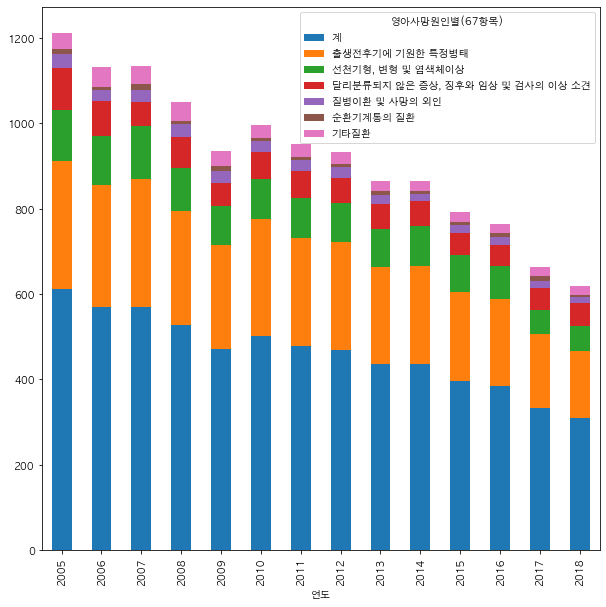

In [62]:
# 조작된 데이터 시각화하기 (연도별 사망원인에 따른 사망자 수)
df6.plot(kind='bar',stacked = True)


위와같이 연도가 증가할 수록 사망자가 감소하고, '출생전후기에 기원한 특정병태'로 인한 질환에 의해 가장 많이 사망한 것을 알 수 있습니다.

### 6.통계 및 머신러닝  
> **상관분석**  

+ 두 집단 간 평균 비교 ( 성별 / 사망 ) 
+ 두 연속형 변수 사이의 상관 관계 ( 연도 / 사망자 수 ) 

<ipython-input-63-3fc146d33cb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death_all['연도'] = df_death_all['연도'].astype(int)


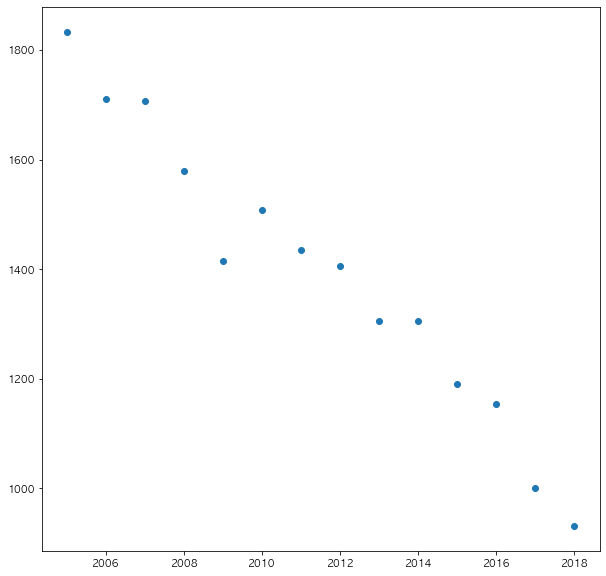

In [63]:
#연도와 사망자 수 간의 상관 관계
#연도별 전체 사망자 수의 상관관계를 구하려고 하기 때문에 앞서 사용했던 df_death_all 데이터 프레임을 활용
df_death_all = df[(df['영아사망원인별(67항목)'] == '계') & (df['생존기간별'] == '전체') & (df['성별'] == '전체') ]
df_death_all['연도'] = df_death_all['연도'].astype(int)
plt.scatter(df_death_all['연도'] , df_death_all['사망자 수(명)'])

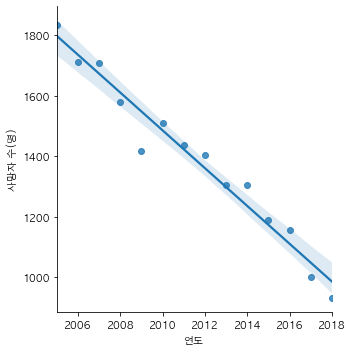

In [64]:
#시본으로 상관분석
sns.lmplot(x='연도' , y='사망자 수(명)',data = df_death_all)

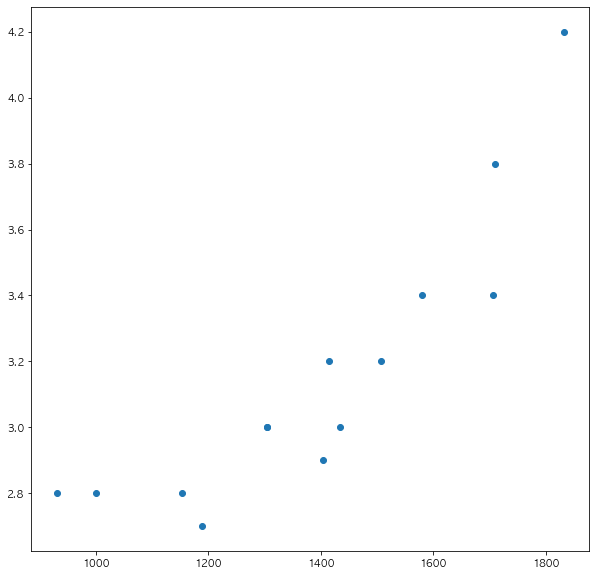

In [65]:
#사망자 수와 영아 사망률 간의 상관관계 
plt.scatter(df_death_all['사망자 수(명)'],df_death_all['영아사망률(천명당)'])

사망자 수가 증가함에 따라 영아 사망률이 증가함을 볼 수 있지만, 그 증가함의 정도가 정비례해 보이진 않습니다, 더 정확한 상관관계 확인을 위해 연속형 변수 사이들의 상관계수를 살펴보겠습니다.

In [66]:
#두 변수의 상관계수 확인


corr = df_death_all.corr()
corr

,연도,사망자 수(명),영아사망률(천명당)
연도,1.000000,-0.980008,-0.890117
사망자 수(명),-0.980008,1.000000,0.875317
영아사망률(천명당),-0.890117,0.875317,1.000000


연도와 사망자 수 간의 상관계수는 -0.98008로, 강한 음의 상관관계를 가지는 것을 알 수 있습니다.  
**하지만 사망자 수와 영아사망률 상관계수는 0.875317로, 완전 정비례하지 않음을 알 수 있습니다. 이러한 사실을 바탕으로 영아 사망자 수가 증가한다고 사망률이 정비례하게 증가하지 않는다는 것을 알 수 있습니다.**  
해당 상관도를 시각화 해봅니다.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


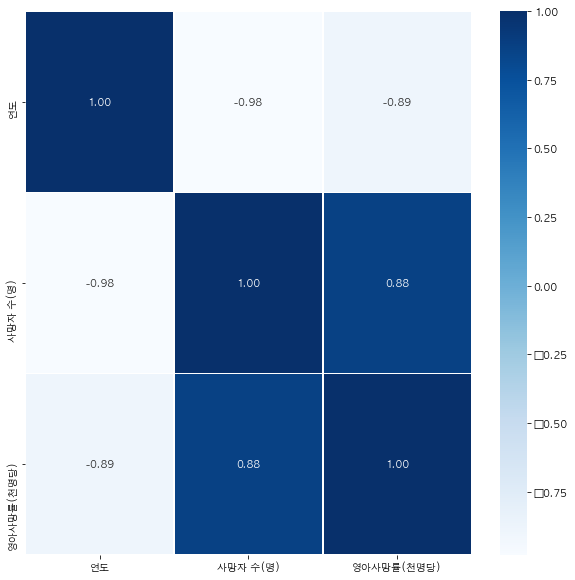

In [67]:
sns.heatmap(data = df_death_all.corr() , annot = True , fmt = '.2f' , linewidths =.5, cmap = 'Blues')

> **회귀분석**  
앞서 상관분석을 마치고 회귀분석을 진행해보겠습니다.  
앞에서 분석한 연도별 사망자 수를 가지고 회귀분석을 진행합니다.  
독립변수(X) : 연도 , 종속변수(Y) : 사망자 수(명)

In [68]:
df_death_all = df_death_all.reset_index()
df_death_all = df_death_all.rename(columns = {'사망자 수(명)':'death' , '연도':'year'})

import statsmodels.api as sm
lin_reg = sm.OLS.from_formula('death ~ year', df_death_all).fit()
lin_reg.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  death   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     291.2
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.83e-10
Time:                        18:39:27   Log-Likelihood:                -74.949
No. Observations:                  14   AIC:                             153.9
Df Residuals:                      12   BIC:                             155.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.271e+05   7366.403     17.252      0.000    1.11e+05    1.43e+05
year         -62.4879      3.662    -17.063      0.000     -70.467     -54.509
==============================================================================
Omnibus:                        5.956   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                3.016
Skew:                          -1.075   Prob(JB):                        0.221
Kurtosis:                       3.742   Cond. No.                     1.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 회귀분석 평가  
1. 회귀모형 : coef계수를 살펴보면, intercept는 1.271e+05 , year은 -62.4879로, 계수값들을 회귀분석 모델에 대입하면 '사망자 수 = -62.4879*연도 +1.271e+05' 의 회귀 모형을 얻을 수 있습니다.  
2. R제곱 : R제곱 값이 0.960으로, 해당 회귀모형이 연도변동성의 96%를 설명한다는 것을 알 수 있습니다.  
3. 유의확률 : 해당 모델의 독립변수의 유의확률은 0으로, 0.05보다 작게 나온것을 알 수 있습니다. 이는 연도가(독립변수) 사망자 수(종속변수)에 유의미하게 영향을 미친다 할 수 있습니다.  
4. Durbin-Waton : 해당 모델의 DW값은 1.759이고 1.5보다 크고 2.5보다 작으므로 자기상관이 없는 독립성을 갖는 것을 판단할 수 있고, 해당 회귀모형이 적합하다는것을 알 수 있습니다.  
5. Df Residuals : 전체 관찰데이터의 수에서 회귀모형의 파라미터의 수를 뺀 값이며 잔차로, 총 잔차의 개수는 12개인 것을 확인할 수 있습니다.   

추가로 잔차 분석을 실행해 보고 회귀분석을 마치도록 하겠습니다. 
(참고 : https://mindscale.kr/course/basic-stat-python/14 )

In [69]:
#예측값과 잔차의 비교
fitted = lin_reg.predict(df_death_all)
residual = df_death_all['death'] - fitted

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


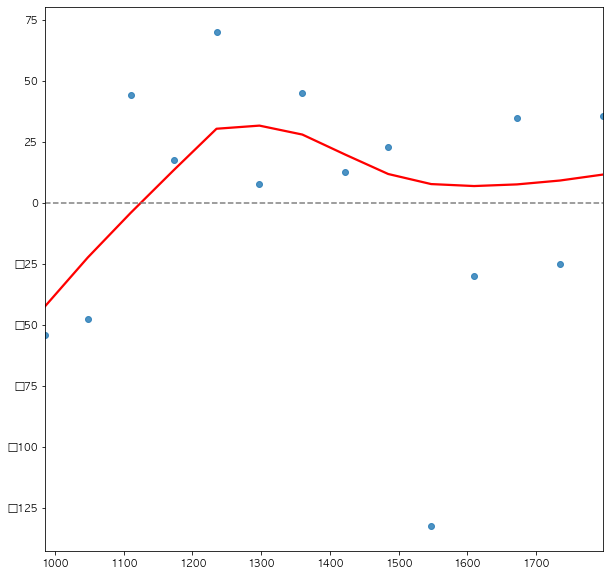

In [70]:
sns.regplot(fitted , residual , lowess =True ,line_kws={'color':'red'})
plt.plot([fitted.min() , fitted.max()],[0,0],'--',color ='grey')

회색 점선은 독립변수에 따른 예측값을 나타내고, 빨간 실선은 잔차의 추세를 나타냅니다. 앞서 구한 회귀모형이 예측값에 따라 잔차가 크게 달라지지 않아야 하려면 빨간 실선이 회색 점선에서 크게 벗어나지 않아야 합니다. 예측에서 많이 벗어나는 잔차들이 보이는데, 극단값을 통해 알아보겠습니다.

In [71]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(lin_reg).cooks_distance
#극단값을 보기 위한 내림차순 정렬
cd.sort_values(ascending = False).head()

4     0.350464
13    0.223618
12    0.119909
9     0.097623
0     0.096469
dtype: float64

4번, 13번 데이터가 예측에서 크게 벗어남을 알 수 있습니다.

### 잔차분석 결과   
예측값과 잔차의 비교를 통해 앞에서 만든 회귀모형이 독립변수에 따라 예측값이 많이 벗어나는 부분이 존재하는 것을 알 수 있습니다. 잔차의 극대값을 찾아 4번, 13번 데이터가 다른 데이터에 비해 매우 크게 예측값으로 부터 벗어나는 것을 알 수 있습니다.  
좀 더 정확한 예측값을 내기 위해서  
> 1. 극단값(4번, 13번)을 제거하고 회귀분석을 재 진행  
> 2. 좀 더 많은 독립변수를 추가하여 회귀모형을 제작하여 잔차가 예측값에서 벗어나는 정도를 줄임    

의 결론을 낼 수 있습니다.

## 7. 결론 및 차별포인트  
위의 데이터 분석을 통해 얻은 정보를 통해 결론을 정리해보면  
> 1. 연도가 증가할 수록 영아 사망자 수와, 사망률이 줄어듭니다.  
2.영아들 중, 남아가 여아보다 사망자 수가 더 많습니다.  
3.영아 사망원인 중, 출생전후 기원한 특정병태의 원인으로 가장 많이 사망한 것을 알 수 있습니다.  

**차별포인트**  
> 1.회귀분석에서 끝내지 않고 잔차 분석을 통해, 해당 회귀모형이 더 좋은 예측값을 내기 위한 결론을 냈습니다.  
2.차이가 미미하고, 양이 많아 구분하기 어려운 변수들을 기타라는 변수로 묶어 새로운 변수로 만들어 데이터 분석에서 조금 더 쉽게 알아볼 수 있도록 하였습니다.  